# Analisis Sentimen Komentar Instagram Cyberbullying Menggunakan Algoritme LSTM dan Bi-LSTM+Word2Vec.
---
Fayza Apriliza - Broyden
Uprak NLP

Pada uprak ini saya membuat beberapa perbandingan algoritma, yakni.
1. [Machine Learning Tradisional (MNB, RF, SVM, LR)](https://colab.research.google.com/drive/1UIZqSzWpoN6U2BMWxKxsBUjmpv-U5YTi?usp=sharing)
2. [LSTM dan Bi-LSTM](https://colab.research.google.com/drive/10OFej4duN7LafPh3npGax76bVIYwmz2w?usp=sharing)

Notes: Hyperlink mengarahkan ke colab code program masing-masing.

# 01 Install & Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 02 Data Acquisition

Mengguanakn dataset sentiment dan komentar instagram mengenai cyberbullying

In [ ]:
# Download dataset
!wget https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv

--2023-04-09 06:12:34--  https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65494 (64K) [text/plain]
Saving to: ‘dataset_komentar_instagram_cyberbullying.csv.1’

dataset_komentar_in 100%[===================>]  63.96K  --.-KB/s    in 0.001s  

2023-04-09 06:12:34 (49.5 MB/s) - ‘dataset_komentar_instagram_cyberbullying.csv.1’ saved [65494/65494]



In [ ]:
data = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')
data.head()

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


Rename column `Instagram Comment Text` menjadi `text`. Tujuannya adalah mempermudah proses selanjutnya karena lebih simple.

In [ ]:
data.rename(columns = {'Instagram Comment Text':'text'}, inplace = True)

Convert sentiment to Numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sentiment'] = le.fit_transform(data['Sentiment'])
data.head()

,Id,Sentiment,text
0,1,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,0,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,0,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


Penjelasan label

👉 Label 1 : positive

👉 Label 0: negative

# 03 Text Preprocessing

**Text Normalize**

Pada tahapan preprocessing, saya menambahkan normalisasi slangword menjadi baku. Dalam tahapan ini saya menggunakan corpus kumpulan slangwords yang telah dibuat oleh orang lain dan menambahkan slangwords tersebut sesuai dataset yang dimiliki.

In [ ]:
# Download corpus kumpulan slangwords
!wget https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv

--2023-04-09 06:12:34--  https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18911 (18K) [text/plain]
Saving to: ‘kamus_singkatan.csv.1’

kamus_singkatan.csv 100%[===================>]  18.47K  --.-KB/s    in 0s      

2023-04-09 06:12:34 (89.8 MB/s) - ‘kamus_singkatan.csv.1’ saved [18911/18911]



In [ ]:
key_norm = pd.read_csv('kamus_singkatan.csv', sep=';', names=['singkat', 'hasil'])
print(key_norm.head())

key_norm.shape

   singkat     hasil
0   aamiin     amin 
1     adek     adik 
2     adlh   adalah 
3      aer      air 
4  aiskrim  es krim 


(1309, 2)

Menambahkan slangwords

In [ ]:
more_key_norm = pd.DataFrame({"singkat":["dgn", "lo", "hadew", "hadeww", "hadewwwww", "duhhh", "kya", "geblek", "ertong", "haters", "kuin", "sorry", "kek", "stju", "msuk", "kitenya", "oon", "sna", "ngrebut", "becus", "kids", "now", "py", "ktakutan", "bp", "apaoun", "tuk", "permpuan", "bangetttt", "akuuu", "yaaa", "yesssssss", "you", "amiiii", "anjirrrr", "anyiennnnggg", "babiii", "bagusss", "bagussss", "beautiful", "cantiik", "cantiikk", "cantikk", "cuantik", "dn", "jijikk", "kaa", "ka", "nyaa", "ogah", "yeee", "yh"],
                    "hasil":["dengan", "kamu", "aduh", "aduh", "aduh", "aduh", "seperti", "goblok", "artis", "pembenci", "ratu", "maaf", "seperti", "setuju", "masuk", "kitanya", "bodoh", "sana", "merebut", "mampu", "anak", "sekarang", "punya", "ketakutan", "bapak", "apapun", "untuk", "perempuan", "sangat", "saya", "ya", "ya", "kamu", "amiin", "anjir", "anjing", "babi", "bagus", "bagus", "cantik", "cantik", "cantik", "cantik", "cantik", "dan", "jijik","kak", "kak", "nya", "tidak", "ya", "ya"]})

In [ ]:
key_norm.tail()

,singkat,hasil
1304,yoi,iya
1305,yup,ya
1306,yups,ya
1307,yupz,ya
1308,ywdh,ya sudah


In [ ]:
key_norm = key_norm.append(more_key_norm, ignore_index = True)
key_norm.tail()

,singkat,hasil
1356,ka,kak
1357,nyaa,nya
1358,ogah,tidak
1359,yeee,ya
1360,yh,ya


In [ ]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [ ]:
'''
Disini, kita tidak banyak melakukan preprocessing karena kita tidak ingin mengubah makna (konteks) dari suatu kata yang menyusun suatu kalimat
'''
import re

def text_preprocessing(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'#[A-Za-z0-9]+','', text)          # Menghapus hastag
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]',' ', text)                # Menghapus karakter tanda baca
  text = re.sub("\s\s+" , " ", text)
  text = text.strip()
  text = text_normalize(text)
  return text

In [ ]:
%time data['clean_teks'] = data['text'].apply(text_preprocessing)

# Perhatikan waktu komputasi ketika proses text preprocessing, bandingkan dengan langkah text preprocessing pada pertemuan sebelumnya

CPU times: user 2.71 s, sys: 156 ms, total: 2.87 s
Wall time: 2.63 s


In [ ]:
data.head()

,Id,Sentiment,text,clean_teks
0,1,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol tidak ada hubungan nya kegugur...
1,2,0,Geblek lo tata...cowo bgt dibela2in balikan......,goblok kamu tata cowok sangat dibelain bali...
2,3,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kemarin termewek sekarang lengket lagi aduh...
3,4,0,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesal dengan att nya tidak usah...
4,5,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",aduh perempuan itu lagi sakit jiwa kenapa ha...


# 05 Word Embedding

## Word2Vec from Scratch

In [ ]:
# Import library
import gensim

# Lihat versi Gensim yang digunakan
gensim.__version__

'4.3.1'

In [ ]:
# Tokenize kata pada setiap kalimat
def tokenization(text):
  text = re.split('\W+', text)
  return text

sentences = data['clean_teks'].apply(lambda x: tokenization(x.lower()))
sentences

0      [username, tolol, tidak, ada, hubungan, nya, k...
1      [goblok, kamu, tata, cowok, sangat, dibelain, ...
2      [kemarin, termewek, sekarang, lengket, lagi, a...
3      [intinya, kalau, kesal, dengan, att, nya, tida...
4      [aduh, perempuan, itu, lagi, sakit, jiwa, kena...
                             ...                        
395    [bangga, sama, suami, yang, selalu, ingat, ist...
396    [apapun, pekerjaannya, yang, penting, halal, k...
397    [gojek, itu, mayoritas, pegangguran, yang, lam...
398    [username, aslinya, cantik, dan, ayu, loh, mba...
399    [username, suami, saya, seumuran, sama, saya, ...
Name: clean_teks, Length: 400, dtype: object

In [ ]:
# Defenisikan parameter training Word2Vec

EMBEDDING_SIZE = 100    # Dimensi word vektor / neuron pada projection (hidden) layer
WINDOW_SIZE = 5         # Window size. Jarak maksimum antara kata saat ini dan yang diprediksi dalam sebuah
MIN_WORD  = 1           # Model akan mengabaikan semua kata dengan frekuensi total lebih rendah dari ini (opsional)
EPOCH = 10              # Jumlah iterasi (epoch).
SG = 1                  # Strategi algoritma pelatihan: 1 untuk skip-gram, 0 untuk CBOW
NEGATIVE = 5            # Negative sampling. Jika 0, negative sampling tidak digunakan

In [ ]:
%%time 

# Proses training Word2Vec

from gensim.models import Word2Vec, FastText, KeyedVectors
model_word2vec = Word2Vec(sentences, vector_size=EMBEDDING_SIZE, sg=SG, min_count=MIN_WORD, window=WINDOW_SIZE, negative=NEGATIVE, epochs=EPOCH)

CPU times: user 375 ms, sys: 1.31 ms, total: 376 ms
Wall time: 376 ms


In [ ]:
# Save Word2Vec sebagai full model
model_word2vec.save('myvec-word2vec-100.model')

In [ ]:
# Save Word2Vec sebagai wordvectors. Hanya menyimpan kata & trained embeddingnya
word2vec_word_vectors = model_word2vec.wv
word2vec_word_vectors.save('myvec-word2vec-100.wordvectors')

In [ ]:
# Cari nilai vektor dari kata tertentu
model_word2vec.wv['cantik']

array([-0.1614658 ,  0.1331118 ,  0.12338991,  0.06481246,  0.00722521,
       -0.40474322,  0.12228817,  0.49404943, -0.10345417, -0.09637956,
       -0.13432644, -0.44449154, -0.09286284,  0.12412005,  0.10208553,
       -0.18255463, -0.01710074, -0.22429386, -0.08813945, -0.37109673,
        0.19508055,  0.12916648,  0.16784392, -0.0343444 ,  0.01264472,
        0.00914965, -0.20936489, -0.15473561, -0.21891758,  0.12587471,
        0.22710295, -0.03934895,  0.1011861 , -0.2308346 , -0.07916082,
        0.2548956 ,  0.00596111, -0.10000372, -0.04522115, -0.32086146,
       -0.06663127, -0.14417353, -0.08983245, -0.04652864,  0.24227355,
       -0.02541853, -0.12957436, -0.05171088,  0.21465267,  0.24062268,
        0.15379854, -0.21233927, -0.04347661, -0.02202062, -0.00893965,
        0.13311017,  0.0966684 ,  0.00369846, -0.21487242,  0.06772751,
        0.0149759 ,  0.00379137, -0.01745742, -0.02078309, -0.1451454 ,
        0.13126644,  0.15267967,  0.24691565, -0.17135939,  0.27

In [ ]:
# Menemukan kata kata teratas yang paling mirip dari kata terentu
# Menghitung kesamaan dari vektor bobot proyeksi dari kata-kata yang diberikan dan vektor untuk setiap kata dalam model.

model_word2vec.wv.most_similar('cantik')

[('kak', 0.998178243637085),
 ('lain', 0.9981412291526794),
 ('menjadi', 0.9981146454811096),
 ('langgeng', 0.9980705976486206),
 ('mata', 0.9980594515800476),
 ('kelakuan', 0.9980481266975403),
 ('macam', 0.9980112314224243),
 ('cucu', 0.9980090856552124),
 ('waktu', 0.9980068206787109),
 ('dong', 0.9980055093765259)]

In [ ]:
# Kata-kata yang ingin kita plot vektornya
word_list = ['bodoh', 'cantik', 'pelakor', 'semangat', 'goblok', 'anjir']

# daftar vektor dari kata-kata tersebut
word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
print(word_vectors)

[[-1.54240370e-01  1.32092059e-01  1.19466625e-01  8.17201510e-02
   1.62017290e-02 -3.98183733e-01  1.11815661e-01  4.91667211e-01
  -9.70488414e-02 -7.17396438e-02 -1.40803248e-01 -4.57747161e-01
  -9.49164256e-02  1.12032369e-01  1.04002908e-01 -1.88652858e-01
  -9.76501126e-03 -2.39261478e-01 -8.03665593e-02 -3.77797633e-01
   2.07766682e-01  1.27540648e-01  1.89689815e-01 -4.16290611e-02
   1.81770306e-02  1.88246574e-02 -2.06303284e-01 -1.37431711e-01
  -2.22989097e-01  1.51392743e-01  2.10902959e-01 -5.99602014e-02
   1.08460337e-01 -2.44136587e-01 -8.68657380e-02  2.66345620e-01
  -2.12606229e-03 -9.59745347e-02 -4.24622633e-02 -3.34847182e-01
  -6.74364790e-02 -1.37567416e-01 -1.03759386e-01 -2.63657067e-02
   2.41578713e-01 -3.23922443e-03 -1.25739649e-01 -7.04067424e-02
   2.06733882e-01  2.47448862e-01  1.43409997e-01 -2.16147378e-01
  -5.28967157e-02 -2.72125211e-02 -1.62755810e-02  1.11398049e-01
   8.68106335e-02  8.90508201e-03 -2.15053663e-01  6.95208386e-02
   1.01049

In [ ]:
# Reduksi dimensi vektor ke 2D menggunakan PCA
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [ ]:
# Lihat vektor hasil PCA (dari 4 dimensi menjadi 2 dimensi)
red_word_vectors

array([[-0.76087856, -0.7625374 ],
       [-0.72962046, -1.2673508 ],
       [-0.9719095 ,  1.6455108 ],
       [ 0.61939746,  0.21536675],
       [ 0.2649568 ,  0.2328088 ],
       [ 1.5780544 , -0.06379866]], dtype=float32)

In [ ]:
def plot(datas, labels, fc='yellow'):
  # plot the dots
  plt.subplots_adjust(bottom = 0.1)
  plt.scatter(datas[:, 0], datas[:, 1], marker='o')

  # annotate labels
  for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
    plt.annotate(label, \
                 xy=(x, y), xytext=(-15, 15), \
                 textcoords='offset points', ha='right', va='bottom', \
                 bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
  plt.show()

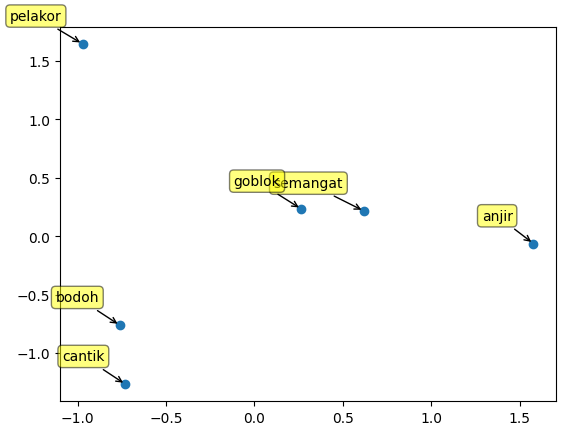

In [ ]:
plot(red_word_vectors, word_list)

# 06 Deep Learning for NLP

## Long short term memory network (LSTM)

### Memilih Panjang Sequence (max_length)

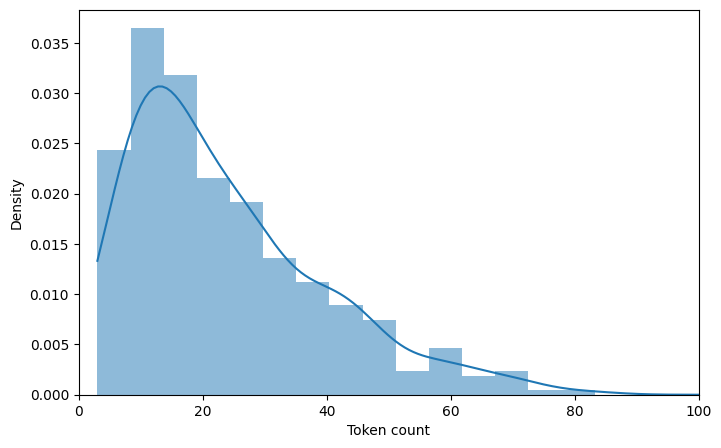

In [ ]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for text in data['clean_teks']:
    tokens = text.split()
    token_lens.append(len(tokens))

plt.figure(figsize=(8, 5))
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [ ]:
MAX_SEQ_LENGTH = 60

### Preparing Data for Embedding Layer

#### Tokenizing Data
Proses ini berbeda dengan tokenization pada text-preprocessing. Pada pemodelan dengan deep learning, tokenization merujuk pada membuat dictionary berdasarkan dataset.

In [ ]:
'''
Proses vektorisasi teks dengan mengubah setiap teks menjadi token urutan bilangan int (setiap bilangan int menjadi indeks token dalam dictionary) 
'''
from keras.preprocessing.text import Tokenizer

In [ ]:
NUM_WORDS = 256     # Frekuensi kemunculan kata. Hanya num_words-1 yang akan disimpan pada dictionary. Berarti kata dengan kemunculan <=num_words tidak digunakan.
OOV_TOKEN = '<unk>'   # Token khusus untuk mengganti kata yang tidak terdaftar dalam dictionary.

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=OOV_TOKEN, lower=True, split=' ')
tokenizer.fit_on_texts(data['clean_teks'])

# Tambahkan token padding untuk menyamakan ukuran dimensi embedding layer
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

WV_DICTIONARY = tokenizer.word_index

WV_DICTIONARY_SIZE = len(WV_DICTIONARY)
print(WV_DICTIONARY_SIZE) # Lihat kata unik pada dictionary yang dihasilkan

2792


In [ ]:
# Lihat dictionary hasil tokenisasi
WV_DICTIONARY

{'<unk>': 1,
 'yang': 2,
 'tidak': 3,
 'di': 4,
 'sama': 5,
 'dan': 6,
 'orang': 7,
 'ya': 8,
 'nya': 9,
 'saja': 10,
 'saya': 11,
 'username': 12,
 'kalau': 13,
 'jadi': 14,
 'dia': 15,
 'sudah': 16,
 'ini': 17,
 'kamu': 18,
 'itu': 19,
 'sangat': 20,
 'anak': 21,
 'ada': 22,
 'juga': 23,
 'sekali': 24,
 'semoga': 25,
 'cantik': 26,
 'artis': 27,
 'lagi': 28,
 'tapi': 29,
 'si': 30,
 'dari': 31,
 'punya': 32,
 'bisa': 33,
 'apa': 34,
 'kaya': 35,
 'jangan': 36,
 'seperti': 37,
 'suka': 38,
 'lebih': 39,
 'buat': 40,
 'karena': 41,
 'sekarang': 42,
 'begitu': 43,
 'kan': 44,
 'ibu': 45,
 'selalu': 46,
 'baik': 47,
 'memang': 48,
 'mba': 49,
 'tahu': 50,
 'dengan': 51,
 'sih': 52,
 'terus': 53,
 'mau': 54,
 'pakai': 55,
 'suami': 56,
 'allah': 57,
 'laki': 58,
 'deh': 59,
 'bagus': 60,
 'biar': 61,
 'ke': 62,
 'keluarga': 63,
 'mbak': 64,
 'benar': 65,
 'bukan': 66,
 'banyak': 67,
 'pelakor': 68,
 'ganteng': 69,
 'bilang': 70,
 'bodoh': 71,
 'lah': 72,
 'istri': 73,
 'n': 74,
 'sok': 75

#### Text to Sequence

In [ ]:
# Proses mengubah token hasil tokenisasi menjadi urutan bilangan int berdasarkan index dictionary.
data_seq = tokenizer.texts_to_sequences(data['clean_teks'])

In [ ]:
# Lihat hasil setelah di ubah menjadi sequences
print(data['clean_teks'][10])
print(data_seq[10])

syarat sah nikah menurut agama islam hanya yaitu adanya cpp adanya cpw saksi wali nikah dan mas kawin mahar perkara makeup tidak  manglingi bukan syarat sah pernikahan sekalipun tidak  makeup tapi syarat yang  tersebut terpenuhi maka pernikahannya sah yak emak emak julids
[1, 213, 78, 242, 243, 1, 176, 1, 244, 1, 244, 1, 1, 1, 78, 6, 177, 1, 1, 1, 1, 3, 1, 66, 1, 213, 1, 1, 3, 1, 29, 1, 2, 1, 1, 1, 1, 213, 245, 1, 1, 1]


#### Add Padding & Truncation

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''
Proses mengubah data dari sequence menjadi array bentuk 2D Numpy (num_samples, num_timesteps). 
num_timesteps adalah argumen maxlen jika disediakan, atau panjang dari sequence terpanjang dalam daftar.

Sequence yang lebih pendek dari num_timesteps diisi dengan nilai hingga panjangnya sama dengan num_timesteps (padding).
Sequence yang lebih panjang dari num_timesteps dipotong sehingga sesuai dengan panjang yang diinginkan (truncate).
'''

from keras_preprocessing.sequence import pad_sequences

In [ ]:
PADDING = 'post'        # Berikan padding untuk setiap sequences. Terdapat dua pilihan dalam melakukan padding 'pre' or 'post'.
TRUNCATING = 'post'     # Menghapus token dari sequences yang lebih besar dari max_lenght. Terdapat dua pilihan dalam melakukan truncanting 'pre' or 'post'.

data_pad = pad_sequences(data_seq, maxlen=MAX_SEQ_LENGTH, padding=PADDING, truncating=TRUNCATING)

In [ ]:
print(data['clean_teks'][15])
print(data_seq[15])
print(data_pad[15])

yang  jadi  masalah disini adalah mereka ciuman depan  orang  banyak  yang  seharusnya sih punya rasa malu kecuali mungkin  lagi  mabok jadi  tidak  ada rasa malu mereka berteman helooow sebuah pertemanan tidak  akan melibatkan ciuman bibir coba saja  kalian bayangin sanggup tidak  ciuman bibir ma teman pasti lebih  dari  teman lah itu dasar kelakuan anak jaman sekarang yang  memang  bodoh  bukan karena  kebanyakan micin lho yah
[2, 14, 1, 1, 1, 81, 1, 1, 7, 67, 2, 1, 52, 32, 1, 127, 1, 160, 28, 1, 14, 3, 22, 1, 127, 81, 1, 1, 1, 1, 3, 99, 1, 1, 1, 150, 10, 214, 1, 1, 3, 1, 1, 151, 1, 112, 39, 31, 1, 72, 19, 92, 1, 21, 141, 42, 2, 48, 71, 66, 41, 247, 179, 1, 215]
[  2  14   1   1   1  81   1   1   7  67   2   1  52  32   1 127   1 160
  28   1  14   3  22   1 127  81   1   1   1   1   3  99   1   1   1 150
  10 214   1   1   3   1   1 151   1 112  39  31   1  72  19  92   1  21
 141  42   2  48  71  66]


#One Hot Encoding
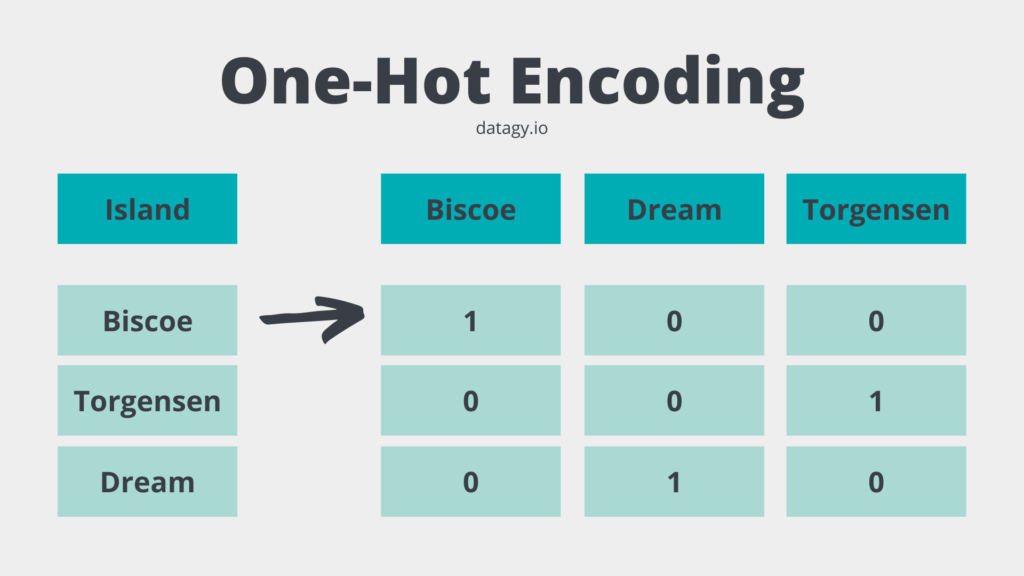

In [ ]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(data['Sentiment'], num_classes=len(data['Sentiment'].unique()))  # Lakukan one-hot encoding pada label (y)

In [ ]:
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

### Train & Test Data Splitting

In [ ]:
# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(data_pad, Y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 60), (80, 60), (320, 2), (80, 2))

### Define Model Architecture (LSTM)



In [ ]:
'''
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

model_LSTM = Sequential()
model_LSTM.add(Embedding(                                           # Buat embedding layer yang menerima panjang dictionary hasil Tokenisasi
    input_dim = WV_DICTIONARY_SIZE,
    input_length = MAX_SEQ_LENGTH,
    output_dim = 64))    
model_LSTM.add(LSTM(64))                                            # Tambahkan satu layer LSTM      
model_LSTM.add(Dropout(0.9))                      
model_LSTM.add(Dense(2, activation='sigmoid'))

In [ ]:
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 60, 64)            178688    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 211,842
Trainable params: 211,842
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 30
BATCH_SIZE = 32

In [ ]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(epsilon=2e-8)

# Compile model
model_LSTM.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#### Training

In [ ]:
%%time
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/30
10/10 [==============================] - 0s 31ms/step - loss: 0.6861 - accuracy: 0.5500 - val_loss: 0.7060 - val_accuracy: 0.3500
Epoch 2/30
10/10 [==============================] - 0s 27ms/step - loss: 0.6880 - accuracy: 0.5437 - val_loss: 0.7128 - val_accuracy: 0.3625
Epoch 3/30
10/10 [==============================] - 0s 28ms/step - loss: 0.6907 - accuracy: 0.5375 - val_loss: 0.7118 - val_accuracy: 0.3500
Epoch 4/30
10/10 [==============================] - 0s 28ms/step - loss: 0.6937 - accuracy: 0.5125 - val_loss: 0.7128 - val_accuracy: 0.3500
Epoch 5/30
10/10 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.5375 - val_loss: 0.7065 - val_accuracy: 0.3375
Epoch 6/30
10/10 [==============================] - 0s 27ms/step - loss: 0.6841 - accuracy: 0.5531 - val_loss: 0.7026 - val_accuracy: 0.3500
Epoch 7/30
10/10 [==============================] - 0s 27ms/step - loss: 0.6855 - accuracy: 0.5500 - val_loss: 0.6892 - val_accuracy: 0.5250
Epoch 8/30
10

In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

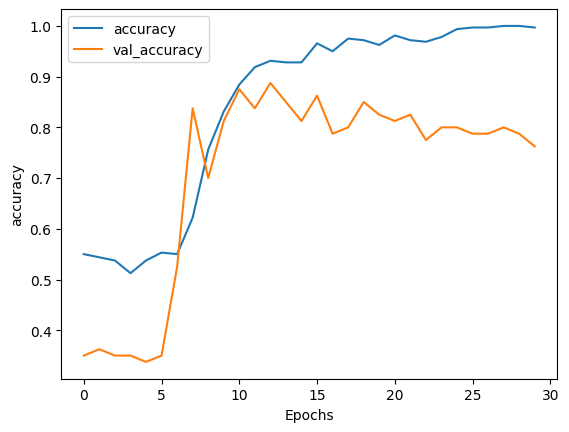

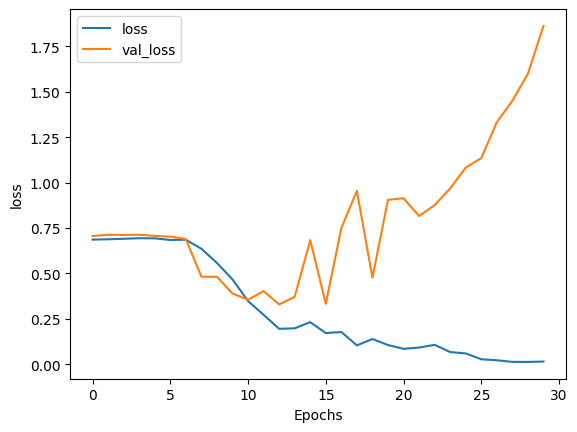

In [ ]:
plot_graphs(history_LSTM, 'accuracy')
plot_graphs(history_LSTM, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM.history['accuracy'][i], history_LSTM.history['loss'][i], history_LSTM.history['val_accuracy'][i], history_LSTM.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.550000 	   0.686058 	   0.350000 	   0.706014
       2   0.543750 	   0.687953 	   0.362500 	   0.712841
       3   0.537500 	   0.690685 	   0.350000 	   0.711751
       4   0.512500 	   0.693681 	   0.350000 	   0.712808
       5   0.537500 	   0.693076 	   0.337500 	   0.706494
       6   0.553125 	   0.684070 	   0.350000 	   0.702581
       7   0.550000 	   0.685516 	   0.525000 	   0.689246
       8   0.621875 	   0.635749 	   0.837500 	   0.481996
       9   0.756250 	   0.557544 	   0.700000 	   0.481785
      10   0.831250 	   0.466874 	   0.812500 	   0.388918
      11   0.884375 	   0.347780 	   0.875000 	   0.355067
      12   0.918750 	   0.272300 	   0.837500 	   0.402629
      13   0.931250 	   0.195026 	   0.887500 	   0.329295
      14   0.928125 	   0.197955 	   0.850000 	   0.371447
      15   0.928125 	   0.231707 	   0.812500 	   0.683491
      16   0.965625 	   0.171831 	   0.862500 

#### Evaluate

In [ ]:
# Lakukan prediksi pada data uji
y_pred = np.argmax(model_LSTM.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

loss, accuracy = model_LSTM.evaluate(X_test, y_test)

3/3 [==============================] - 0s 8ms/step - loss: 1.8622 - accuracy: 0.7625


In [ ]:
from sklearn.metrics import classification_report

# Tampilkan laporan klasifikasi yang dilakukan model pada data uji
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        30
           1       0.83      0.78      0.80        50

    accuracy                           0.76        80
   macro avg       0.75      0.76      0.75        80
weighted avg       0.77      0.76      0.76        80



## Bidirectional Long short term memory network (Bi-LSTM) + Word2Vec
Contoh sebelumnya kita hanya menggunakan dictionary yang dihasilkan ketika proses Tokenizing. Lalu, ketika pemodelan ditambahkan layer embedding sebelum di fitkan ke layer LSTM.


Selanjutnya, kita akan memanfaatkan word2vec yang telah dilatih pada proses sebelumnya untuk mengubah teks menjadi bentuk vektor.





### Load Word2Vec

In [ ]:
# Load word2vec yang telah kita simpan
from gensim.models import KeyedVectors

my_word2vec = KeyedVectors.load('myvec-word2vec-100.wordvectors', mmap='r')
words = list(my_word2vec.key_to_index.keys())
words

['yang',
 'tidak',
 'di',
 'sama',
 'dan',
 'orang',
 'ya',
 'saja',
 'nya',
 'saya',
 'username',
 'kalau',
 'jadi',
 'sudah',
 'dia',
 'ini',
 'kamu',
 'itu',
 'sangat',
 'anak',
 'ada',
 'juga',
 'sekali',
 'semoga',
 'cantik',
 'artis',
 'lagi',
 'tapi',
 'si',
 '',
 'dari',
 'punya',
 'bisa',
 'apa',
 'kaya',
 'jangan',
 'lebih',
 'suka',
 'seperti',
 'karena',
 'buat',
 'sekarang',
 'kan',
 'ibu',
 'begitu',
 'selalu',
 'memang',
 'mba',
 'baik',
 'tahu',
 'mau',
 'dengan',
 'sih',
 'terus',
 'suami',
 'allah',
 'pakai',
 'deh',
 'bagus',
 'laki',
 'biar',
 'ke',
 'keluarga',
 'banyak',
 'bukan',
 'benar',
 'mbak',
 'ganteng',
 'pelakor',
 'lah',
 'istri',
 'bodoh',
 'n',
 'bilang',
 'sok',
 'kita',
 'nikah',
 'masih',
 'manusia',
 'mereka',
 'sendiri',
 'perempuan',
 'suaranya',
 'mampu',
 'ayu',
 'kok',
 'kali',
 'sehat',
 'keren',
 'semua',
 'cuma',
 'pernah',
 'anaknya',
 'mirip',
 'atau',
 'malah',
 'dasar',
 'bapak',
 'sampai',
 'akan',
 'dunia',
 'pada',
 'baru',
 'tuh',
 

In [ ]:
# Load word2vec yang telah kita simpan
from gensim.models import KeyedVectors

my_word2vec = KeyedVectors.load('myvec-word2vec-100.wordvectors', mmap='r')
#my_word2vec_vocab = my_word2vec.wv.vocab   //deprecated to load vocab  
my_word2vec_vocab = list(my_word2vec.key_to_index.keys())

VOCAB_SIZE = len(my_word2vec_vocab)
EMBEDDING_SIZE = my_word2vec.vector_size

print(VOCAB_SIZE)
print(EMBEDDING_SIZE)

2793
100


In [ ]:
word2vec_dict = {}

for word in my_word2vec_vocab:
    word2vec_dict[word] = my_word2vec.get_vector(word)   
    
print('The numbers of key-value pairs: ', len(word2vec_dict)) # Harus sama dengan ukuran vocab word2vec

The numbers of key-value pairs:  2793


### Create Embedding Matrix

In [ ]:
EMBEDDING_MATRIX = np.zeros(shape=(WV_DICTIONARY_SIZE, EMBEDDING_SIZE))

for word, i in tokenizer.word_index.items():
  embed_vector = word2vec_dict.get(word)
  if embed_vector is not None:               # Word is in the vocabulary learned by the w2v model
    EMBEDDING_MATRIX[i] = embed_vector

In [ ]:
# Cek index keberapa di Word2Vec vocabulary dari suatu kata
print(WV_DICTIONARY.get('saya'))

11


In [ ]:
# Cek vector dari suatu kata
print(EMBEDDING_MATRIX[25])

[-1.69827387e-01  1.34412646e-01  1.24633692e-01  5.17699867e-02
  5.80713758e-03 -4.02128458e-01  1.06317975e-01  5.07321239e-01
 -9.62098911e-02 -8.06826130e-02 -1.46525294e-01 -4.53059584e-01
 -1.03129938e-01  1.32007331e-01  1.29578799e-01 -1.85374081e-01
 -2.13884120e-03 -2.59000808e-01 -5.98921962e-02 -3.69714469e-01
  2.22947016e-01  1.46366134e-01  1.77191958e-01 -5.88898398e-02
 -5.97202312e-03  3.17085609e-02 -2.16645658e-01 -1.50496244e-01
 -2.13401556e-01  1.39731660e-01  2.40509182e-01 -5.93630336e-02
  8.49028826e-02 -2.50887930e-01 -9.42615643e-02  2.56676853e-01
  6.01511355e-03 -8.57092440e-02 -6.82584643e-02 -3.20506006e-01
 -4.56387065e-02 -1.32358536e-01 -9.34643969e-02 -5.40826581e-02
  2.33883664e-01 -2.11828966e-02 -1.50706887e-01 -5.42256199e-02
  2.07400188e-01  2.39403889e-01  1.45885691e-01 -2.18446955e-01
 -3.59690934e-02 -1.96758620e-02 -2.02683434e-02  1.42488852e-01
  8.62598792e-02  1.36628952e-02 -2.25357369e-01  3.45855542e-02
 -1.34328159e-03 -5.37026

In [ ]:
# Cek dimensi word vector. X = jumlah kata pada vocabulary, y = dimensi vektor
EMBEDDING_MATRIX.shape

(2792, 100)

### Define Model (Bi LSTM)
Nah, sekarang kita membahkan layer embedding berdasarkan matrix embedding yang di dapatkan dari word2vec yang sudah kita latih sebelumnya. Selain itu, kita akan mencoba menggunakan arsitektur Bidirectional LSTM.

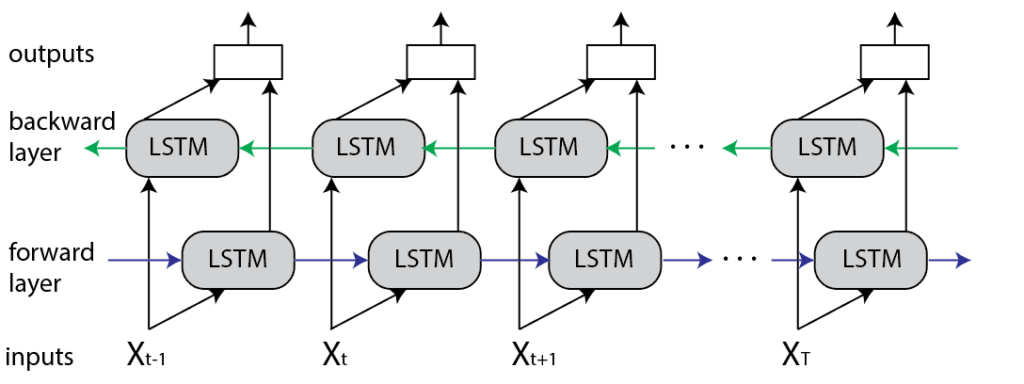



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout
from tensorflow.keras.initializers import Constant

model_BiLSTM_w2v = Sequential()
model_BiLSTM_w2v.add(Embedding(
    input_dim = WV_DICTIONARY_SIZE,
    output_dim = EMBEDDING_SIZE,
    input_length = MAX_SEQ_LENGTH,
    # trainable = False,
    embeddings_initializer = Constant(EMBEDDING_MATRIX)))
model_BiLSTM_w2v.add(Bidirectional(LSTM(64)))
# model_BiLSTM_w2v.add(LSTM(32))
# model_LSTM.add(Dropout(0.9))
model_BiLSTM_w2v.add(Dense(2, activation='sigmoid'))

In [ ]:
model_BiLSTM_w2v.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 60, 100)           279200    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 363,938
Trainable params: 363,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(epsilon=2e-8)

In [ ]:
# Compile model
model_BiLSTM_w2v.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Training

In [ ]:
%%time

EPOCH = 30
BATCH_SIZE = 32

history_BiLSTM_w2v = model_BiLSTM_w2v.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/30
10/10 [==============================] - 4s 116ms/step - loss: 0.6978 - accuracy: 0.4812 - val_loss: 0.7140 - val_accuracy: 0.4125
Epoch 2/30
10/10 [==============================] - 0s 48ms/step - loss: 0.6798 - accuracy: 0.5375 - val_loss: 0.7190 - val_accuracy: 0.3750
Epoch 3/30
10/10 [==============================] - 0s 45ms/step - loss: 0.6635 - accuracy: 0.5719 - val_loss: 0.7284 - val_accuracy: 0.4375
Epoch 4/30
10/10 [==============================] - 0s 50ms/step - loss: 0.6216 - accuracy: 0.7125 - val_loss: 0.6401 - val_accuracy: 0.7000
Epoch 5/30
10/10 [==============================] - 1s 65ms/step - loss: 0.5384 - accuracy: 0.7688 - val_loss: 0.4486 - val_accuracy: 0.8625
Epoch 6/30
10/10 [==============================] - 1s 78ms/step - loss: 0.4638 - accuracy: 0.8313 - val_loss: 0.4356 - val_accuracy: 0.8125
Epoch 7/30
10/10 [==============================] - 1s 49ms/step - loss: 0.3936 - accuracy: 0.8562 - val_loss: 0.4636 - val_accuracy: 0.8000
Epoch 8/30
1

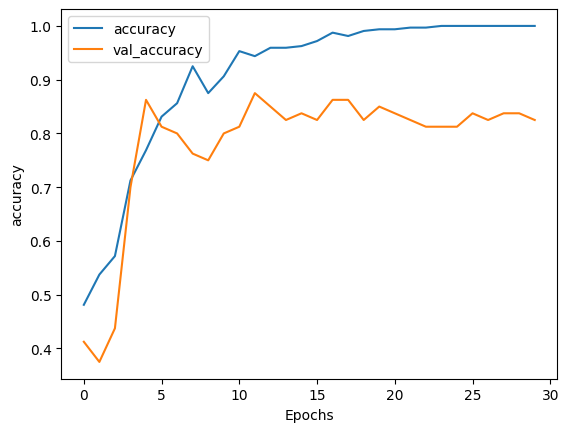

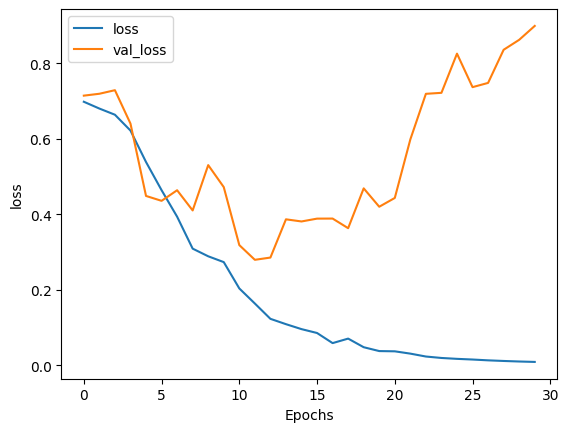

In [ ]:
plot_graphs(history_BiLSTM_w2v, 'accuracy')
plot_graphs(history_BiLSTM_w2v, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_BiLSTM_w2v.history['accuracy'][i], history_BiLSTM_w2v.history['loss'][i], history_BiLSTM_w2v.history['val_accuracy'][i], history_BiLSTM_w2v.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.481250 	   0.697824 	   0.412500 	   0.714008
       2   0.537500 	   0.679840 	   0.375000 	   0.718991
       3   0.571875 	   0.663490 	   0.437500 	   0.728443
       4   0.712500 	   0.621603 	   0.700000 	   0.640056
       5   0.768750 	   0.538366 	   0.862500 	   0.448551
       6   0.831250 	   0.463835 	   0.812500 	   0.435585
       7   0.856250 	   0.393637 	   0.800000 	   0.463645
       8   0.925000 	   0.309066 	   0.762500 	   0.410179
       9   0.875000 	   0.288810 	   0.750000 	   0.530164
      10   0.906250 	   0.273407 	   0.800000 	   0.471919
      11   0.953125 	   0.203700 	   0.812500 	   0.318448
      12   0.943750 	   0.163819 	   0.875000 	   0.279486
      13   0.959375 	   0.123288 	   0.850000 	   0.285445
      14   0.959375 	   0.109154 	   0.825000 	   0.386674
      15   0.962500 	   0.096038 	   0.837500 	   0.380993
      16   0.971875 	   0.085779 	   0.825000 

### Evaluate

In [ ]:
# Lakukan prediksi pada data uji
y_pred = np.argmax(model_BiLSTM_w2v.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

loss, accuracy = model_BiLSTM_w2v.evaluate(X_test, y_test)

3/3 [==============================] - 0s 11ms/step - loss: 0.8985 - accuracy: 0.8250


In [ ]:
# Tampilkan laporan klasifikasi yang dilakukan model pada data uji
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.85      0.85      0.85        47

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.82      0.82      0.82        80



# Kesimpulan✨

Berdasarkan evaluasi diperoleh akurasi sebagai berikut.
1. LSTM: 76%
2. Bi-LSTM + Word2Vec: 82%

Bi-LSTM lebih baik dibandingkan LSTM dalam kasus ini dan menggunakan hyperparameter
1. Epoch: 30
2. Batch size: 32
3. Optimizer: Adam dengan epsilon 2e-8
